In [530]:
import sys, os
from cProfile import label
import importlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c
import tools

In [531]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [532]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [533]:
#units
nm = 1e-9
um = 1e-6

In [534]:
icApi = lumapi.INTERCONNECT()

In [535]:
icApi.switchtolayout()
icApi.deleteall()

In [536]:
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.set('number of input ports', 2)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))
icApi.set('number of points', 100000)

<h1>SiEPIC PDK devices</h1>

In [537]:
icApi.switchtolayout()
icApi.addelement('ebeam_dc_te1550')
icApi.set('name', 'c1')
icApi.addelement('ebeam_dc_te1550')
icApi.set('name', 'c2')
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg1')
icApi.set('Rotated', 45)
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg2')
icApi.set('Rotated', 45)

In [538]:
#positioning elements
icApi.setposition('c1',45,200)
icApi.setposition('c2',45,500)
icApi.setposition('wg1',150,350)
icApi.setposition('wg2',-90,350)

In [539]:
#connections
#ring
icApi.connect('c1','opt_2','wg2','port 1')
icApi.connect('c1','opt_4','wg1','port 1')
icApi.connect('c2','opt_1','wg2','port 2')
icApi.connect('c2','opt_3','wg1','port 2')
#ona connections
icApi.connect('ona1','output','c2','opt_2')
icApi.connect('c1','opt_1','ona1','input 2')
icApi.connect('c2','opt_4','ona1','input 1')

1.0

<h2>1nm simulation</h2>

In [540]:
ng = 4.19088
neff = 2.44533
lambda0 = 1550*nm
FSR_values = [1,10,20]
Lr = []
for FSR in FSR_values:
    Lr.append((lambda0**2)/(ng*FSR*nm))

In [541]:
print(Lr[0]/um,Lr[1]/um,Lr[2]/um)

573.2686213873938 57.32686213873937 28.663431069369686


In [542]:
print((Lr[0]/2 - (np.pi*r + Lc))/um)

266.9263474257479


In [543]:
Lc = 14*um
r = 5*um
icApi.switchtolayout()
#dc coupling lengths
icApi.select('c1')
icApi.set('coupling_length', Lc)
icApi.set('radius',r)
icApi.select('c2')
icApi.set('coupling_length', Lc)
icApi.set('radius',r)
#waveguide lengths
icApi.select('wg1')
icApi.set('wg_length', Lr[0]/2 - (np.pi*r + Lc))
icApi.select('wg2')
icApi.set('wg_length', Lr[0]/2 - (np.pi*r + Lc))

In [544]:
icApi.save('PDKRingResonator_1nm')
icApi.run()

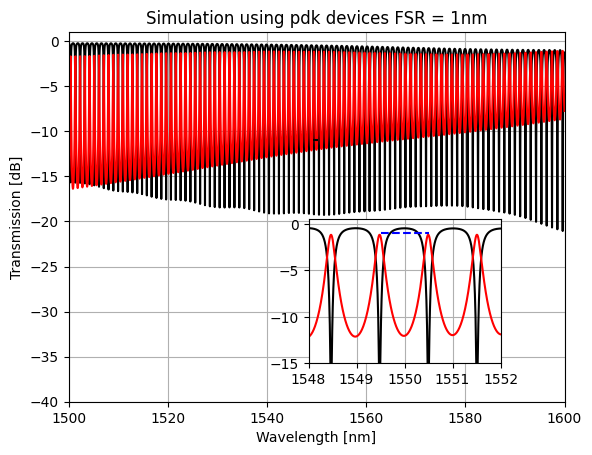

In [545]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red',label='Drop')
plt.hlines(-11,xmin=1549.2,xmax=1550.2, color='black',linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-40, 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.title('Simulation using pdk devices FSR = 1nm')
plt.grid()
#zooming to see the FSR on the transmission graph
zoom = plt.axes([0.5,0.19,0.3,0.3])
zoom.set_xlim(1548, 1552)
zoom.set_ylim(-15,0.5)
zoom.grid()
zoom.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black')
zoom.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red')
zoom.hlines(-1,xmin=1549.5,xmax=1550.5, color='blue',linestyles='dashed')

plt.savefig('Simulation using pdk devices FSR = 1nm.png')

<h2>10nm simulation</h2>

In [459]:
print((Lr[1]/2 - (np.pi*r + 4*um))/um)

8.95546780142072


In [546]:
Lc = 4*um
r = 5*um
icApi.switchtolayout()
#dc coupling lengths
icApi.select('c1')
icApi.set('coupling_length', Lc)
icApi.set('radius',r)
icApi.select('c2')
icApi.set('coupling_length', Lc)
icApi.set('radius',r)
#waveguide lengths
icApi.select('wg1')
icApi.set('wg_length', Lr[1]/2 - (np.pi*r + Lc))
icApi.select('wg2')
icApi.set('wg_length', Lr[1]/2 - (np.pi*r + Lc))

In [547]:
icApi.save('PDKRingResonator_10nm')
icApi.run()

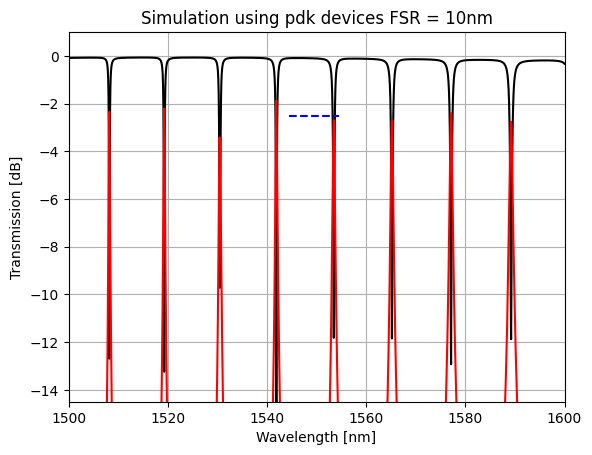

In [548]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red')
h10 = 1544.5
plt.hlines(-2.5,xmin=h10,xmax=h10+10, color='blue',linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-14.5, 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using pdk devices FSR = 10nm')
plt.savefig('Simulation using pdk devices FSR = 10nm.png')

<h2>20nm simulation</h2>

In [580]:
icApi.switchtolayout()
icApi.deleteall()
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.set('number of input ports', 2)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))
icApi.set('number of points', 100000)

In [581]:
icApi.addelement('ebeam_dc_te1550')
icApi.set('name', 'c1')
icApi.addelement('ebeam_dc_te1550')
icApi.set('name', 'c2')
icApi.addelement('ebeam_dc_te1550')
icApi.set('name', 'c3')
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg1')
icApi.set('Rotated', 45)
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg2')
icApi.set('Rotated', 45)
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg3')
icApi.set('Rotated', 45)
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg4')
icApi.set('Rotated', 45)

In [582]:
#positioning elements
icApi.setposition('c1',45,200)
icApi.setposition('c2',45,800)
icApi.setposition('c3',45,500)
icApi.setposition('wg1',150,650)
icApi.setposition('wg2',-90,650)
icApi.setposition('wg3',150,350)
icApi.setposition('wg4',-90,350)

In [583]:
#connections
#upper ring
icApi.connect('c1','opt_2','wg4','port 1')
icApi.connect('c1','opt_4','wg3','port 1')
icApi.connect('c3','opt_1','wg4','port 2')
icApi.connect('c3','opt_3','wg3','port 2')
#lower ring
icApi.connect('c3', 'opt_2', 'wg2', 'port 1')
icApi.connect('c3', 'opt_4', 'wg1', 'port 1')
icApi.connect('c2', 'opt_1', 'wg2', 'port 2')
icApi.connect('c2', 'opt_3', 'wg1', 'port 2')
#ona connections
icApi.connect('ona1','output','c1','opt_1')
icApi.connect('c1','opt_3','ona1','input 2')
icApi.connect('c2','opt_4','ona1','input 1')

1.0

In [584]:
importlib.reload(tools) 
#14,4 e 12
my_dict = tools.ringData(10,2,ng,20e-9)
print(my_dict['FSR'], my_dict['L'])

[6.666666666666667e-09, 1e-08] [8.599029320810903e-05, 5.732686213873936e-05]


In [585]:
Lc1 = 14*um
Lc2 = 5.5*um
lwgd1 =  my_dict['L'][1] - (Lc1+Lc2) - 2*np.pi*r
lwgd2 =  my_dict['L'][0] - (Lc1) - 2*np.pi*r
lwgd2/um/2

20.287183336105553

In [586]:
icApi.switchtolayout()
#FSR = 10 nm ring
icApi.disconnect('c3','opt_2','wg2','port 1')
icApi.disconnect('c3','opt_4','wg1','port 1')
icApi.disconnect('c2','opt_4','ona1','input 1')

icApi.connect('c3','opt_2','ona1','input 1')

1.0

In [588]:
icApi.switchtolayout()  
icApi.select('c1')
icApi.set('coupling_length', Lc1)
icApi.select('c2')
icApi.set('coupling_length', Lc1)
icApi.select('c3')
icApi.set('coupling_length', Lc2)
icApi.select('wg3')
icApi.set('wg_length', lwgd1)
icApi.select('wg4')
icApi.set('wg_length', lwgd1)
icApi.select('wg1')
icApi.set('wg_length', lwgd2)
icApi.select('wg2')
icApi.set('wg_length', lwgd2)

In [589]:
icApi.save('10nmSeriesRingsPDK')
icApi.run()

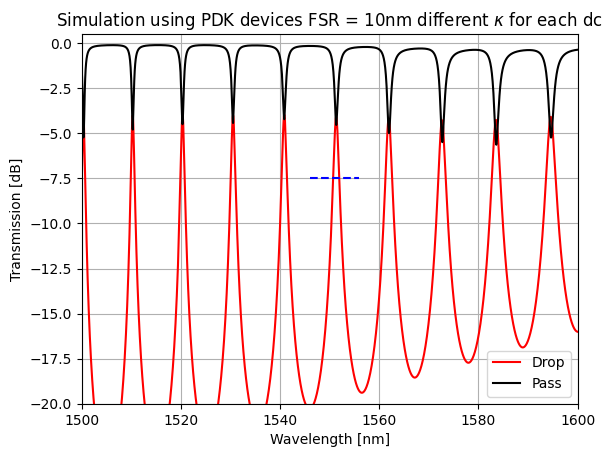

In [590]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='red',label='Drop')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='black', label='Pass')
plt.legend()
fsrh_20 = 1546
plt.hlines(-7.5,xmin=fsrh_20,xmax=fsrh_20+10, color='b',linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-20, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title(r'Simulation using PDK devices FSR = 10nm different $\kappa$ for each dc')
plt.savefig('Simulation using ideal devices FSR = 20nm series configuration PDK.png')

In [591]:
icApi.switchtolayout()
icApi.disconnect('c3','opt_4','ona1','input 1')
icApi.disconnect('ona1','output','c1','opt_1')
icApi.disconnect('c3','opt_4','ona1','input 1')
icApi.disconnect('c3','opt_1','wg4','port 2')
icApi.disconnect('c3','opt_3','wg3','port 2')
icApi.disconnect('ona1','input 2','c1','opt_3')
icApi.disconnect('ona1','input 1','c3','opt_2')
icApi.connect('c3', 'opt_2', 'wg2', 'port 1')
icApi.connect('c3', 'opt_4', 'wg1', 'port 1')

icApi.connect('ona1','output','c3','opt_1')
icApi.connect('c3','opt_3','ona1','input 1')
icApi.connect('c2','opt_2','ona1','input 2')

1.0

In [592]:
icApi.select('c2')
icApi.set('coupling_length', Lc2)
icApi.select('c3')
icApi.set('coupling_length', Lc1)

In [593]:
icApi.save('6nmSeriesRingsPDK')
icApi.run()

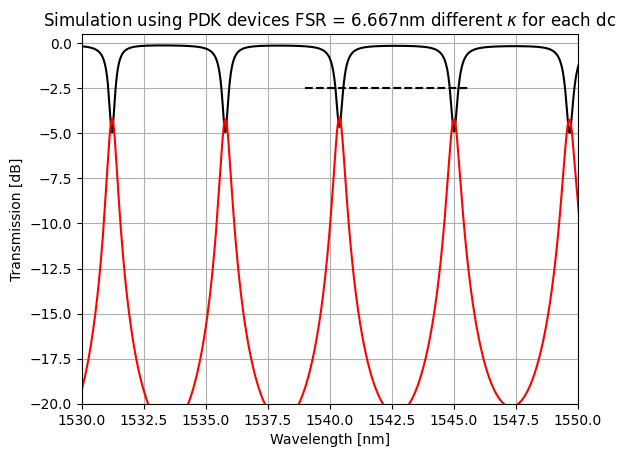

In [594]:
#Wglength for 6.667 = 21.287183336105553
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red')
fsrh = 1539
plt.hlines(-2.5,xmin=fsrh,xmax=fsrh + 6.67 , color='black',linestyles='dashed')
plt.xlim(1530, 1550)
plt.ylim(-20, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title(r'Simulation using PDK devices FSR = 6.667nm different $\kappa$ for each dc')
plt.savefig('Simulation using ideal devices FSR = 6.66nm series configuration PDK.png')

<h2>20nm Series full configuration</h2>

In [595]:
icApi.switchtolayout()
icApi.disconnect('c3','opt_1','ona1','output')

icApi.disconnect('c3','opt_3','ona1','input 1')
icApi.disconnect('c2','opt_2','ona1','output')
icApi.disconnect('c2','opt_2','ona1','input 2')

icApi.disconnect('ona1','output','c3','opt_2')
icApi.disconnect('c3','opt_1','ona1','input 2')

#connections
#upper ring
icApi.connect('c3','opt_1','wg4','port 2')
icApi.connect('c3','opt_3','wg3','port 2')
#lower ring
#icApi.connect('c3', 'opt_2', 'wg2', 'port 1')
#icApi.connect('c3', 'opt_4', 'wg1', 'port 1')
#ona connections
icApi.connect('ona1','output','c1','opt_1')
icApi.connect('c1','opt_3','ona1','input 2')
icApi.connect('c2','opt_4','ona1','input 1')

1.0

In [596]:
print(Lc2)

5.5e-06


In [606]:
icApi.switchtolayout()  
icApi.select('c1')
icApi.set('coupling_length', Lc1)
icApi.select('c2')
icApi.set('coupling_length', Lc1)
icApi.select('c3')
icApi.set('coupling_length', Lc2)
icApi.select('wg3')
icApi.set('wg_length', lwgd1)
icApi.select('wg4')
icApi.set('wg_length', lwgd1)
icApi.select('wg1')
icApi.set('wg_length', lwgd2/2)
icApi.select('wg2')
icApi.set('wg_length', lwgd2/2)

In [607]:
icApi.save('20nmSeriesRingsPDK')
icApi.run()

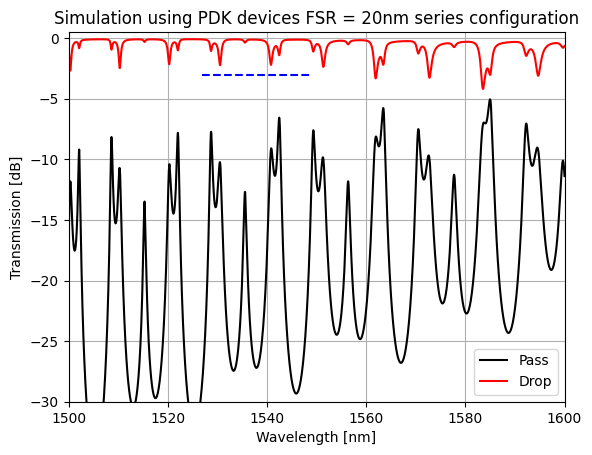

In [608]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red',label='Drop')
fsrh = 1527
plt.hlines(-3,xmin=fsrh,xmax=fsrh+22, color='b',linestyles='dashed')
plt.legend()
plt.xlim(1500, 1600)
plt.ylim(-30, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using PDK devices FSR = 20nm series configuration')
plt.savefig('Simulation using PDK devices FSR = 20nm series configuration PDK.png')

In [599]:
icApi.switchtolayout()  
icApi.select('c1')
icApi.set('coupling_length', Lc1)
icApi.select('c2')
icApi.set('coupling_length', 12*um)
icApi.select('c3')
icApi.set('coupling_length', 5.5*um)
icApi.select('wg3')
icApi.set('wg_length', 6*um)
icApi.select('wg4')
icApi.set('wg_length', 6*um)
icApi.select('wg1')
icApi.set('wg_length', 20.2377*um)
icApi.select('wg2')
icApi.set('wg_length', 20.2377*um)

In [600]:
icApi.save('20nmSeriesRingsPDKadjusted')
icApi.run()

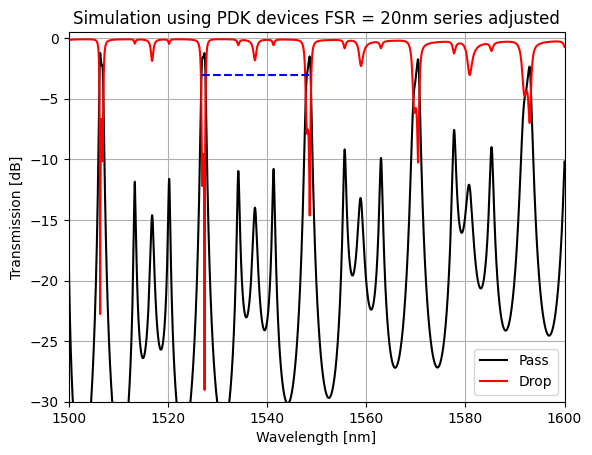

In [601]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2["'TE' gain (dB)"],color='red',label='Drop')
fsrh = 1527
plt.hlines(-3,xmin=fsrh,xmax=fsrh+22, color='b',linestyles='dashed')
plt.legend()
plt.xlim(1500, 1600)
plt.ylim(-30, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using PDK devices FSR = 20nm series adjusted')
plt.savefig('Simulation using PDK devices FSR = 20nm series configuration PDK adjusted.png')